# Transit: lightcurve extraction and analysis

In this notebook, we will focus on transits. A transit is the passage of a celestial body between a larger body and the observer. When such event appens, the perciveid luminosity of the larger object briefly goes down, which make it detectable by studying the lightcurve of the large body.

In this practical work, we will be interested in exoplanet transits. As of 1 january 2024, there are 5576 confirmed exoplanets (Wikipedia). Most of them can be detected by transit. It is possible to know in advance when it will be possible to observe a transit, using internet websites. In the following, we will use [Transit Finder](https://astro.swarthmore.edu/transits/transits.cgi), a website that allows users to select transits that satisfies mulitple constraints (depth, magnitude, sky location, etc.).\
\
The three main characteristics of transit are:
- The transit ***depth*** (how much light from the observed star is blocked by the transiting exoplanet)
- The transit ***duration***
- The planet's orbital ***period***

## 1. Find what transit you want to study

Go on [Transit Finder](https://astro.swarthmore.edu/transits/transits.cgi). Use the following parameters:
- ***Target list***: NASA Exoplanet Archive database
- ***Observatory***: 
    - latitude: 42.936389
    - longitude: 0.142778
    - timezone: UTC
- ***Date windows***:
    - base date: 01-30-2024
    - show transits for the next 3 days
- ***Depth***: 20
- Leave default value for the remaining parameters

Click ```Submit```

You should get a table listing 14 observable transits that satisfy our constraints. To select show only transit that are fully visible, drag the slider ```Show if visible transit % + baseline % > 100```. You now have 12 remaining entries in the table. ***KELT-23 A b*** is quite interesting:
- Its magnitude is 10.3, so it should be easy to see it with our instrument.
- Its duration is 2h04, with a suggested start en end observation time at 23h03 and 3h07 respectively, which is reasonnable for us.
- The moon should not be too problematic.

However, its depth is not that high with only 21.0. However, if we consider both its magnitude and its depth, it should not be a problem.

# 2. Get the lightcurve of KELT-23 A b

We will use the [lightkurve](https://docs.lightkurve.org/) python package to anaylse our transit(s) data and determine the period of the transit. We can as well retreive data form knwon transits. It will be usefull to exerce ourselve on transit analysis.

First, import the lightkurve package

In [1]:
import lightkurve as lk
%matplotlib inline

Next, search an available pixel file for ***KELT-23 A b***. A target Pixel File contains movies of the pixel data centered on a single target star.

In [2]:
pixelfile = lk.search_targetpixelfile("KELT-23 A b")
pixelfile

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,458478250,0.0
1,TESS Sector 17,2019,SPOC,120,458478250,0.0
2,TESS Sector 16,2019,SPOC,120,458478250,0.0
3,TESS Sector 15,2019,SPOC,120,458478250,0.0
4,TESS Sector 23,2020,SPOC,120,458478250,0.0
5,TESS Sector 21,2020,SPOC,120,458478250,0.0
6,TESS Sector 47,2021,SPOC,120,458478250,0.0
7,TESS Sector 41,2021,SPOC,120,458478250,0.0
8,TESS Sector 57,2022,SPOC,20,458478250,0.0


There are 27 possible entries. Each entry corresponds to observations of the target by the Transiting Exoplanet Survey Satellite (TESS) space telescope at different period. Let us choose the 19th entry. We will download the file an put it in the ```transit/``` folder

In [3]:
data = pixelfile[19].download(download_dir = 'transit/')

If you already have the file, you can read it

In [4]:
data = lk.read("transit/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000458478250-s0021_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000458478250-s0021_tess_v1_tp.fits")

What does it look like?

<Axes: title={'center': 'Target ID: 458478250, Cadence: 30865'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

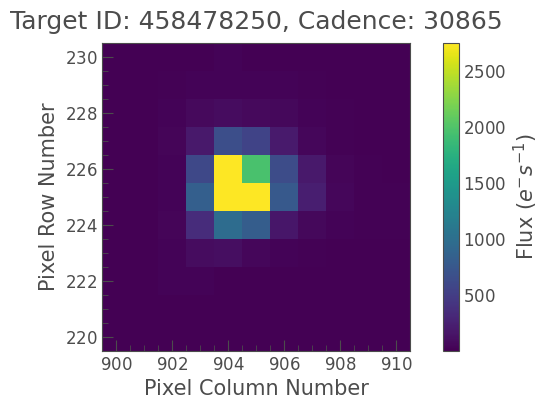

In [5]:
data.plot(frame = 1)

The target is clearly visible. To only consider only the target, we can select pixel that fall in a mask. Such mask is porovided in the file

In [6]:
mask = data.pipeline_mask

Let us see what it look like

<Axes: title={'center': 'Target ID: 458478250, Cadence: 30864'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

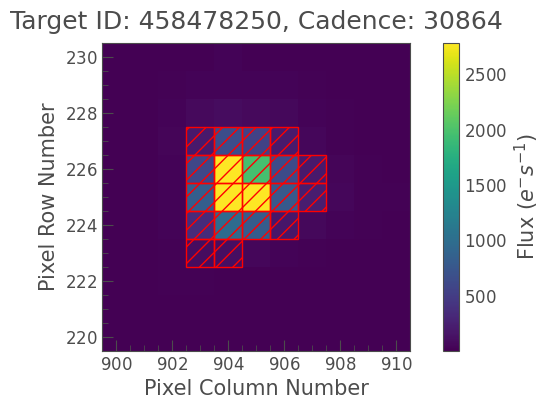

In [7]:
data.plot(aperture_mask = mask)

To extract the light curve, we will only consider pixels that fall in this mask (the red zone). Now it is time for the complecated part: extract the light curve! This is very complicated, you should really follow these steps carrefully. Ready ? Let's do this!

In [8]:
lc = data.to_lightcurve(aperture_mask=mask)   # create a raw lightcurve using the mask we extracted earlier

That's it! It was very hard, but we managed to do it! What does it look like?

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

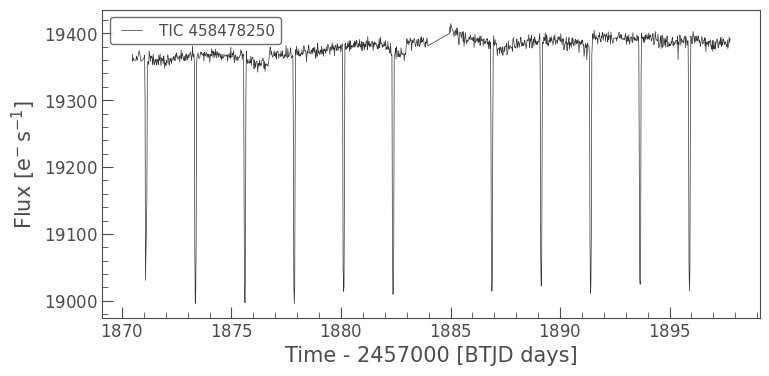

In [9]:
lc.plot()

This is very clean. We clearly see mulitple regularly spaced deeps in the light curve. Rember, what we observe is not the object itself, but the star around wich it orbits. This deep in the lightcurve correspond to moments when the object pass before the star, blocking part of its light, which lower its perceived luminosity.\
Before doing anything else, let remove any possible NaN value:

In [10]:
lc = lc.remove_nans()

# 3. Get the period of KELT-23 A b

On this lightcurve, the period of the object can be easyly determined by constructing a periodogram. A periodogram is basically a fourier transform of the lightcurve.

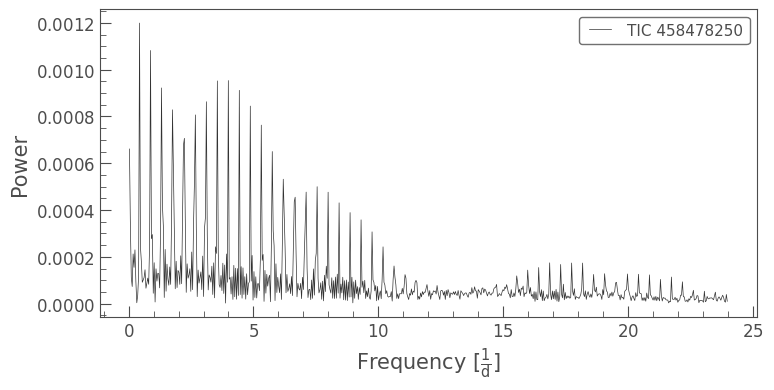

In [11]:
pg = lc.normalize().to_periodogram(oversample_factor=1)
pg.plot();

We clearly see here oscillations. The one that is interesting us biggest one. Indeed, if a reapting event happen a lot in the time domaine, it will appear in the frequency domaine has a big power spike at a certain frequency. And what happens regularly in our lightcurve? the transit! Thus, the frequency of this wighest peak is directly linked to the period of the transit.\
Let us show how it looks like in the period space:

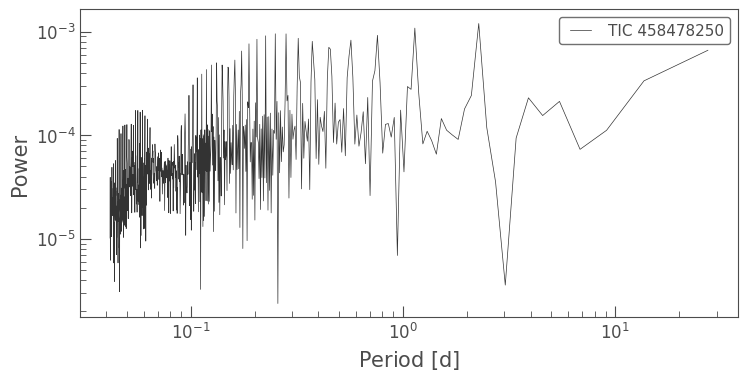

In [12]:
pg.plot(view='period', scale='log');

The highest power peak is between 2 and 3 days. Let us get the corresponding period:

In [13]:
period = pg.period_at_max_power
period

<Quantity 2.27433293 d>

We find a period of 2.27 days. The real period of ***KELT-23 A b*** is 2.26 days. Our estimation is quite good! If we repeat this method for all 27 available entries, we should be able to constraint our estimation even more.

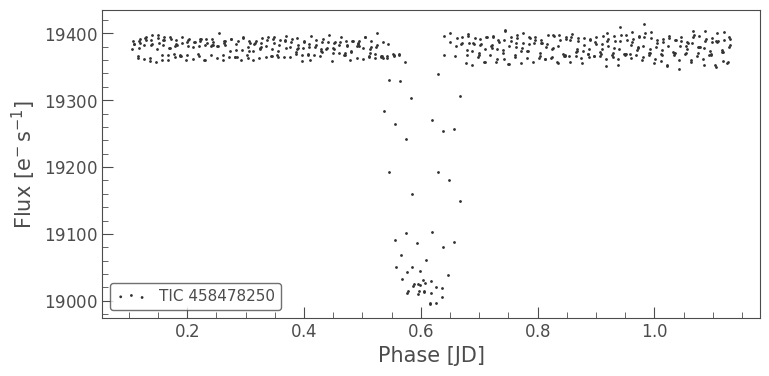

In [14]:
lc.fold(2.26)[700:].scatter();

# And after?

With a light curve, it is possible to estimate some characteristics of a transiting object, like the planet-star ratio (directly linked to the depth), the semi-major axis, the orbital exentricity, etc. The Python package [Pytransit](https://hpparvi.github.io/PyTransit/) offer the possibility to easily estimate the characteristics of a transit using an MCMC based approche. You can try to test it for KELT-23 A b.